In [1]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
!pip3 install wandb

     |████████████████████████████████| 2.0MB 5.5MB/s 
     |████████████████████████████████| 102kB 7.6MB/s 
     |████████████████████████████████| 133kB 16.8MB/s 
     |████████████████████████████████| 163kB 16.3MB/s 
     |████████████████████████████████| 71kB 6.5MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8786 sha256=d36c59f85889eeb81cb16653ca7014abb92f40bf6205a04781637ef11f7e60c3
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6489 sha256=e1c23da186f7761745d5d3a287c810153e7c2bcff5a3b444fa3ce6cbcc6bf7ee
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
Successfully built pathtools subprocess32


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Conv2D
from tensorflow.keras.activations import *
from tensorflow.keras.callbacks import EarlyStopping
import wandb
from wandb.keras import *
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!unzip /content/drive/MyDrive/Colab\ Notebooks/Projects/TensorFlow/Todo/Dogs-or-Cats/data.zip -d /content/drive/MyDrive/Colab\ Notebooks/Projects/TensorFlow/Todo/Dogs-or-Cats/

Archive:  /content/drive/MyDrive/Colab Notebooks/Projects/TensorFlow/Todo/Dogs-or-Cats/data.zip
replace /content/drive/MyDrive/Colab Notebooks/Projects/TensorFlow/Todo/Dogs-or-Cats/dataset/test_set/cats/cat.4001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
directory = "/content/drive/MyDrive/Colab Notebooks/Projects/TensorFlow/Todo/Dogs-or-Cats"

In [5]:
# dog vs cat/dataset

In [6]:
import matplotlib.image as mpimg

In [7]:
import os

In [8]:
len(os.listdir(directory + '/dvc/dataset/training_set/cats'))

4000

In [9]:
len(os.listdir(directory + '/dvc/dataset/training_set/dogs'))

4000

In [10]:
os.listdir(directory + '/dvc/dataset/')

['test_set', 'training_set']

In [11]:
len(os.listdir(directory + '/dvc/dataset/test_set/cats'))

1000

In [12]:
len(os.listdir(directory + '/dvc/dataset/test_set/dogs'))

1000

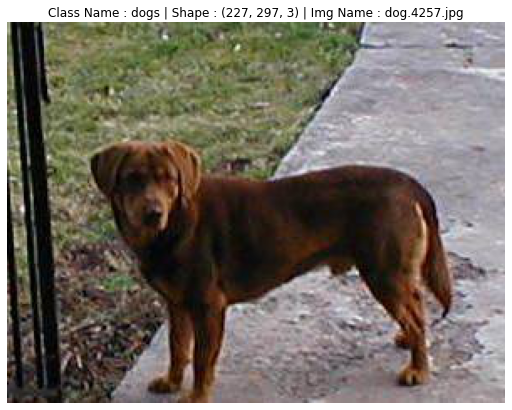

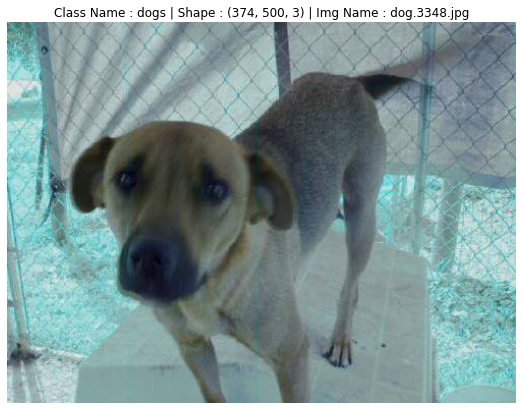

In [13]:
import random
for _ in range(2):
  types_of_data = random.choice(['training_set','test_set'])
  dataset_type = random.choice(['dogs','cats'])
  choice = random.choice(os.listdir(directory + f'/dvc/dataset/{types_of_data}/{dataset_type}/'))
  plt.figure(figsize=(10,7))
  img = mpimg.imread(directory + f'/dvc/dataset/{types_of_data}/{dataset_type}/{choice}')
  plt.imshow(img)
  plt.title(f'Class Name : {dataset_type} | Shape : {img.shape} | Img Name : {choice}')
  plt.axis(False)
  plt.show();

In [14]:
train_dir = directory + '/dataset/training_set/'
test_dir = directory + '/dataset/test_set/'

In [15]:
train_datagen = ImageDataGenerator(rescale=1/255.0,rotation_range=0.25,width_shift_range=0.25,height_shift_range=0.25,zoom_range=0.25,horizontal_flip=True,vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1/255.0)

In [16]:
class_names = os.listdir(train_dir)

In [17]:
class_names

['cats', 'dogs']

In [18]:
train_data = train_datagen.flow_from_directory(train_dir,target_size=(224,224),class_mode='binary')
test_data = train_datagen.flow_from_directory(test_dir,target_size=(224,224),class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [19]:
len(train_data)

250

In [20]:
len(test_data)

63

### Modelling

In [21]:
import wandb
from wandb.keras import WandbCallback

In [22]:
from tensorflow.keras.layers import *

In [23]:
from tensorflow.keras import Sequential

In [24]:
# wandb.init(project='dog-or-cat',name='baseline')
# baseline_model = Sequential([
#   Conv2D(10,3,input_shape=(224,224,3),activation=relu),
#   MaxPool2D(),
#   Conv2D(10,3,activation=relu),
#   MaxPool2D(),
#   Conv2D(10,3,activation=relu),
#   Flatten(),
#   Dense(1,activation=sigmoid)
# ])
# baseline_model.compile(loss=BinaryCrossentropy(),metrics=['accuracy'],optimizer=Adam())
# baseline_model.fit(test_data,epochs=round(12.5),callbacks=[WandbCallback()])

In [25]:
# Activation
# Filters
# Kernal Size
# epochs
# total layers
# lr

In [26]:
# Activation

In [27]:
# activations = [relu,elu,tanh,selu,exponential]
# for activation in activations:
#   wandb.init(project='dog-or-cat',name=f"0-{activation}-at")
#   model = Sequential([
#     Conv2D(10,3,input_shape=(224,224,3),activation=activation),
#     MaxPool2D(),
#     Conv2D(10,3,activation=activation),
#     MaxPool2D(),
#     Conv2D(10,3,activation=activation),
#     Flatten(),
#     Dense(1,activation=sigmoid)
#   ])
#   model.compile(loss=BinaryCrossentropy(),metrics=['accuracy'],optimizer=Adam())
#   model.fit(test_data,epochs=round(12.5),callbacks=[WandbCallback()])

In [28]:
# Filters

In [29]:
# filters = [10,15,20,25]
# for filter in filters:
#   wandb.init(project='dog-or-cat',name=f"0-{filter}-f")
#   model = Sequential([
#     Conv2D(filter,3,input_shape=(224,224,3),activation=relu),
#     MaxPool2D(),
#     Conv2D(filter,3,activation=relu),
#     MaxPool2D(),
#     Conv2D(filter,3,activation=relu),
#     Flatten(),
#     Dense(1,activation=sigmoid)
#   ])
#   model.compile(loss=BinaryCrossentropy(),metrics=['accuracy'],optimizer=Adam())
#   model.fit(test_data,epochs=round(12.5),callbacks=[WandbCallback()])

In [30]:
# lr

In [31]:
# lrs = [0.001,0.01,0.1,1.0]
# for lr in lrs:
#   wandb.init(project='dog-or-cat',name=f"0-{lr}-lr")
#   model = Sequential([
#     Conv2D(10,3,input_shape=(224,224,3),activation=relu),
#     MaxPool2D(),
#     Conv2D(10,3,activation=relu),
#     MaxPool2D(),
#     Conv2D(10,3,activation=relu),
#     Flatten(),
#     Dense(1,activation=sigmoid)
#   ])
#   model.compile(loss=BinaryCrossentropy(),metrics=['accuracy'],optimizer=Adam(lr=lr))
#   model.fit(test_data,epochs=round(12.5),callbacks=[WandbCallback()])

In [32]:
# epochs

In [33]:
# epochs = [25,50,100]
# for epoch in epochs:
#   wandb.init(project='dog-or-cat',name=f"0-{epoch}-epoch")
#   model = Sequential([
#     Conv2D(10,3,input_shape=(224,224,3),activation=relu),
#     MaxPool2D(),
#     Conv2D(10,3,activation=relu),
#     MaxPool2D(),
#     Conv2D(10,3,activation=relu),
#     Flatten(),
#     Dense(1,activation=sigmoid)
#   ])
#   model.compile(loss=BinaryCrossentropy(),metrics=['accuracy'],optimizer=Adam(lr=0.001))
#   model.fit(test_data,epochs=round(epoch),callbacks=[WandbCallback()])

In [34]:
# Results

In [35]:
# Activation = relu
# Filters = 20
# Kernal Size = 3
# epochs = 142
# total layers = 10
# lr = Default

In [36]:
wandb.init(project='dog-or-cat',name=f"Big-Dog-Model-1")
model = Sequential([
  Conv2D(20,3,input_shape=(224,224,3),activation=relu),
  MaxPool2D(),
  Conv2D(20,3,activation=relu),
  MaxPool2D(),
  Conv2D(20,3,activation=relu),
  MaxPool2D(),
  Conv2D(20,3,activation=relu),
  MaxPool2D(),
  Conv2D(20,3,activation=relu),
  MaxPool2D(),
  Conv2D(20,3,activation=relu),
  Flatten(),
  Dense(1,activation=sigmoid)
])
model.compile(loss=BinaryCrossentropy(),metrics=['accuracy'],optimizer=Adam())
model.fit(train_data,validation_data=(test_data),epochs=100,callbacks=[WandbCallback(),EarlyStopping(patience=5)])
model.save(directory + '/model_1.h5')

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch 1/100
 57/250 [=====>........................] - ETA: 19:31 - loss: 0.6926 - accuracy: 0.5055

KeyboardInterrupt: ignored

Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7f880a1bbed0>> (for post_run_cell):


KeyboardInterrupt: ignored